# Project 5
## CS 5483
## Due 5 Dec at 9 am

All the import statements

In [54]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
from random import sample
import itertools
import matplotlib.pyplot as plt



### Question 1: Community Detection

1.a) Create random graphs using barabasi albert model with 1000 nodes and value of m ranging from 1 to 10

In [209]:
#nodes told to be as 200
for i in range (1, 11):
    #print (i)
    locals()['G'+str(i)] = nx.barabasi_albert_graph(200, i)

1.b) For each of the graphs created using barabasi model, find the number of communities using Grivan Newman algorithm

Reference: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

In [215]:
for i in range (1, 11):
    comp = community.girvan_newman(locals()['G'+str(i)])
    #limited = itertools.takewhile(lambda c: len(c) <= 15 , comp) <<< in case we want only the first 15 communities
    for communities in comp:
        locals()['number_of_community_G'+str(i)]=len(tuple(sorted(c) for c in communities))
#if we do not limit number of communities, it goes all the way till single nodes and therefore
#since every single node can be in the community list, each graph has upto 200 community

In [230]:
for i in range (1, 11):
    print(locals()['number_of_community_G'+str(i)])

200
200
200
200
200
200
200
200
200
200


In [238]:
for i in range (1, 11):
    comp = community.girvan_newman(locals()['G'+str(i)])
    limited = itertools.takewhile(lambda c: len(c) <= 15 , comp) #in case we want only the first 15 communities
    for communities in limited:
        locals()['number_of_community_limited_G'+str(i)]=len(tuple(sorted(c) for c in communities))

for i in range (1, 11):
    print(locals()['number_of_community_limited_G'+str(i)])

15
15
15
15
15
15
15
15
15
15


1.c) For each graph calculate the highest modularity score for a maximum of 15 components using the communities created from 1.b)

`
 k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    comms = tuple(sorted(c) for c in communities)
    modularity = community.modularity(G, comm)
`

use this a base code to calculate the maximum modularity up to 15 components. Also, fetch the store the number of components to which the graph exhibits maximum modularity.

In [259]:
modularity_of_communities = []
number_of_comp_max_modu = []
for i in range (1, 11):
    comp = community.girvan_newman(locals()['G'+str(i)])
    limited = itertools.takewhile(lambda c: len(c) <= 15 , comp) #we want only the first 15 communities
    modularity_max = 0 #consider zero as max(to find max)
    for communities in limited:
        comms = tuple(sorted(c) for c in communities)
        modularity = community.modularity((locals()['G'+str(i)]), comms)
        if modularity > modularity_max:
            modularity_max = modularity
            comm_len_max_modularity = len(comms)
    modularity_of_communities.append(modularity_max)
    number_of_comp_max_modu.append(comm_len_max_modularity)


In [261]:
#number of components to which the graph exhibits maximum modularity
number_of_comp_max_modu

[15, 11, 14, 15, 15, 15, 15, 15, 15, 9]

In [263]:
#maximum modularity for each graph
modularity_of_communities

[0.8479457589454762,
 0.480936256504456,
 0.3401773929873116,
 0.08293094023324679,
 0.023728599605519166,
 0.014175257731957658,
 0.006330535650593978,
 0.0028938717312283176,
 0.003139635345441175,
 0.0010419667590028908]

1.d) For each value of m, plot the number of communities on y-axis and the respective values of m on x-axis.

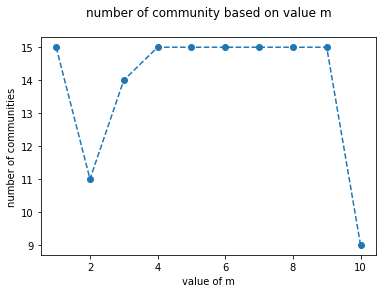

In [289]:
x=list(range(1, 11))
y=number_of_comp_max_modu
plt.plot(x, y, '--', marker ='o')
#plt.ylim(0,20)
plt.title("number of community based on value m\n")
plt.xlabel('value of m')
plt.ylabel('number of communities')
plt.show()

## Question 2: Network Percolation

2.a) Download the following power grid network and store it in a graph H

http://networkrepository.com/power-US-Grid.php

Find the size of the largest connected component (Giant component) of the graph H

In [323]:
el = open ("power-US-Grid.mtx", 'rb') # open file and rb is for read-binary
H = nx.read_edgelist(el, nodetype=int) # edges on each line of the input
el.close()
#Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
#len(Gcc[0])
#G0 = H.subgraph(Gcc[0])
largest_cc = max(nx.connected_components(G), key=len)
print("size of the Giant component of the graph H =  " +str(len(largest_cc)))

size of the Giant component of the graph H =  4941


Phi is defined as a occupation probability

2.b) Construct 11 subgraphs for the power grid network using the occupation probabilty as a parameter.

Perform the operation for phi = 0, 0.1, 0.2, 0.3, ..., 0.9, 1.0

In [325]:
#H = nx.Graph()
L = len(H.nodes)
count = 1
for i in np.arange(0.1, 1.1, 0.1):
    set_of_node = sample(H.nodes, int((i * L)))
    locals()['H' + str(count)] = H.subgraph(set_of_node)
    count += 1

2.c) Find the connected components for all the subgraphs and also the size of the largest connected components for all the subgraphs.

Find the ratio of the size of the largest connected component of each subgraphs with the size of the largest connected component in H 

In [408]:
size_largers_cc = []
L=len(H.nodes)
ratio = []
num_con_comps = []

for i in range(1, 11):
    con_comps = sorted(nx.connected_components(locals()['H' + str(i)]), key=len, reverse=True)
    num_con_comps.append(len(con_comps))
    largest_cc = max(con_comps)
    size_largers_cc.append(len(largest_cc))
    ratio.append(len(largest_cc)/L)


In [422]:
for i in range(0, 10):
    print("#connected_components H" +str(i+1) + ": " + str(num_con_comps[i])+"   size_of_largest: " +str(size_largers_cc[i]) +
          "   " + "   Ratio: "+ str(ratio[i]))

#connected_components H1: 425   size_of_largest: 4      Ratio: 0.0008095527221210282
#connected_components H2: 718   size_of_largest: 10      Ratio: 0.0020238818053025702
#connected_components H3: 900   size_of_largest: 14      Ratio: 0.0028334345274235984
#connected_components H4: 996   size_of_largest: 32      Ratio: 0.0064764217769682254
#connected_components H5: 946   size_of_largest: 76      Ratio: 0.015381501720299534
#connected_components H6: 776   size_of_largest: 286      Ratio: 0.05788301963165351
#connected_components H7: 621   size_of_largest: 853      Ratio: 0.17263711799230924
#connected_components H8: 383   size_of_largest: 3002      Ratio: 0.6075693179518317
#connected_components H9: 209   size_of_largest: 4002      Ratio: 0.8099574984820886
#connected_components H10: 1   size_of_largest: 4941      Ratio: 1.0


2.d) Let S be the size of the fraction of the giant component, plot S on y-axis and phi on x-axis.

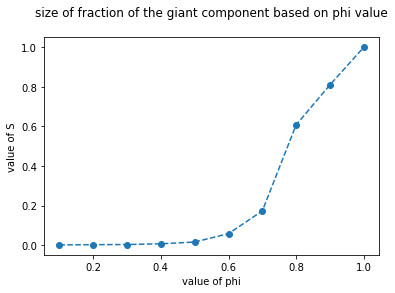

In [424]:
phi = np.arange(0.1, 1.1, 0.1)
S = ratio
plt.plot(phi, S, '--', marker ='o')
#plt.ylim(0,20)
plt.title("size of fraction of the giant component based on phi value\n")
plt.xlabel('value of phi')
plt.ylabel('value of S')
plt.show()